<a href="https://colab.research.google.com/github/MahmoudEl-sherbiny/DEPI/blob/main/Deep_Learning_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

# df.head()
print(df.shape)  # (48842, 15)

# Separate features and target
# X = df.drop(columns="class")
# y = df["class"]


(48842, 15)


In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


* Education Droped becasue we have smae column but numeric
* Not informative for prediction,acts like an ID/weighting variable, It can add noise without improving prediction

In [5]:
df.drop(["fnlwgt", "education"], axis=1, inplace=True)

In [6]:
print(df.isnull().sum().sum())
df.dropna(inplace=True)

6465


In [7]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

5982


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39240 non-null  int64   
 1   workclass       39240 non-null  category
 2   education-num   39240 non-null  int64   
 3   marital-status  39240 non-null  category
 4   occupation      39240 non-null  category
 5   relationship    39240 non-null  category
 6   race            39240 non-null  category
 7   sex             39240 non-null  category
 8   capital-gain    39240 non-null  int64   
 9   capital-loss    39240 non-null  int64   
 10  hours-per-week  39240 non-null  int64   
 11  native-country  39240 non-null  category
 12  class           39240 non-null  category
dtypes: category(8), int64(5)
memory usage: 2.1 MB


In [9]:
categorical_data = df.select_dtypes(["category"])
numeric_data = df.select_dtypes(["int64", "float64"])

In [10]:
numeric_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,39240.000000,39240.000000,39240.000000,39240.000000,39240.000000
mean,39.309225,10.136290,1253.314246,101.261340,41.206091
std,13.298041,2.637194,7993.997264,431.434412,12.458021
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
categorical_data.describe()

,workclass,marital-status,occupation,relationship,race,sex,native-country,class
count,39240,39240,39240,39240,39240,39240,39240,39240
unique,7,7,14,6,5,2,41,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,27717,17947,5516,15645,33064,26097,35340,29265


In [12]:
def hist_with_box(data, col_name):
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  sns.histplot(data=data, x=col_name)

  plt.subplot(1, 2, 2)
  sns.boxplot(data=data, x=col_name)

  plt.show()


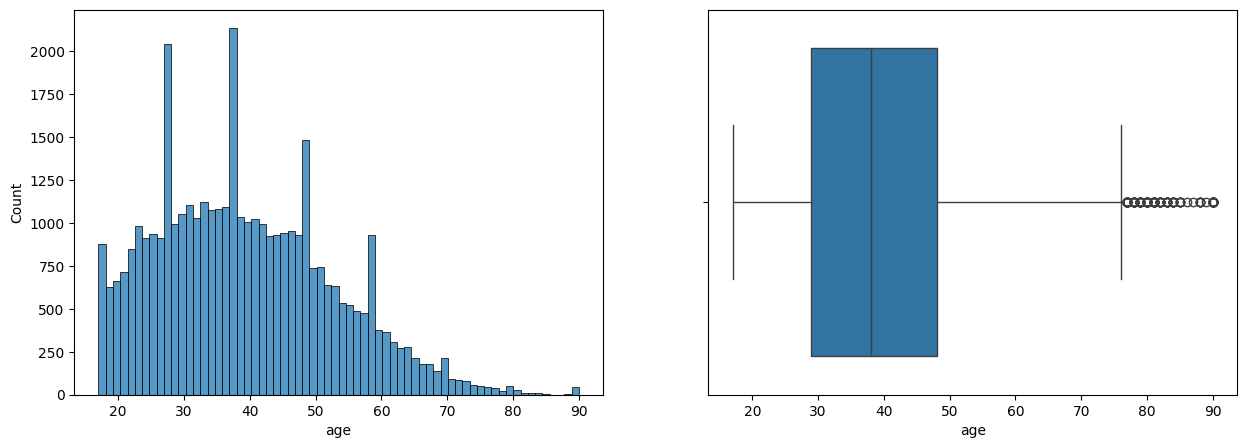

In [13]:
hist_with_box(data=numeric_data, col_name="age")

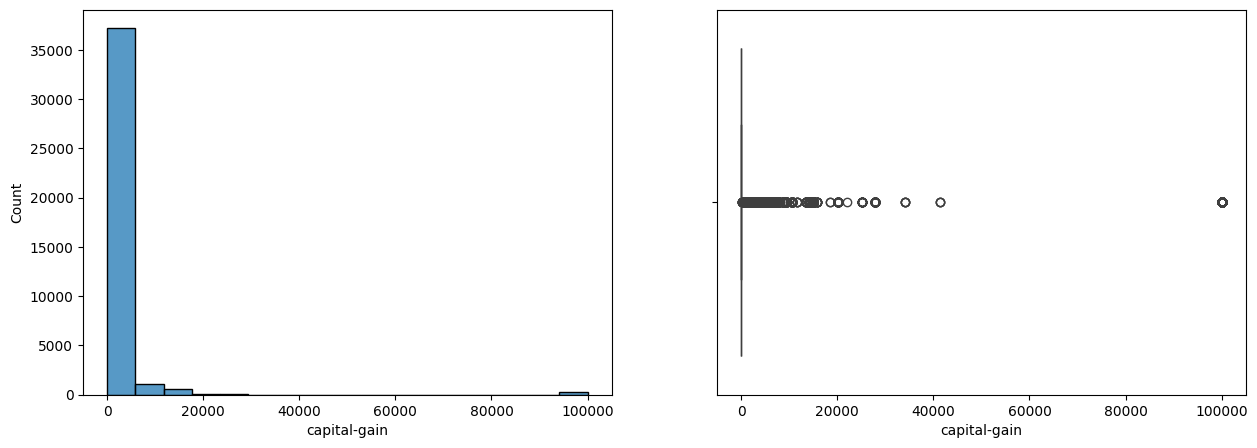

In [14]:
hist_with_box(data=numeric_data, col_name="capital-gain")

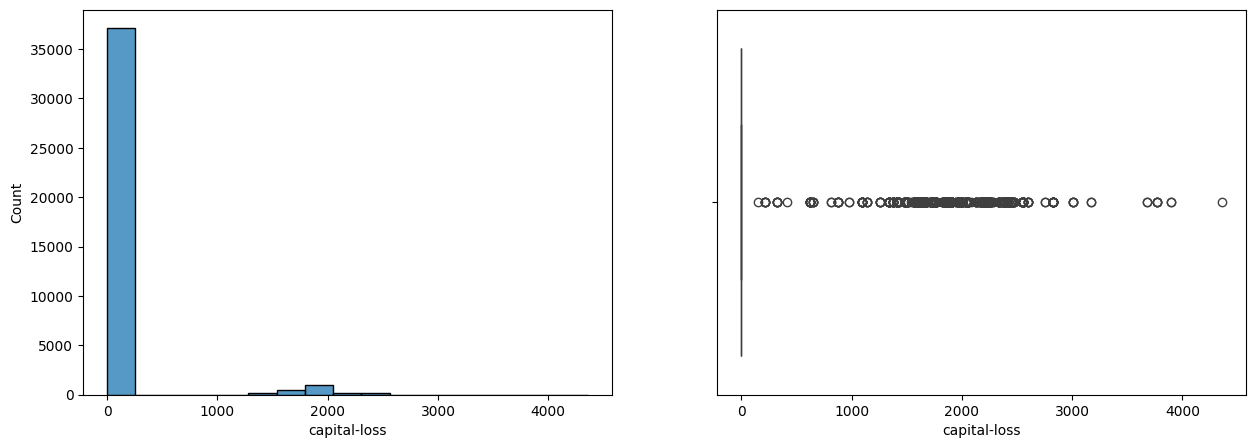

In [15]:
hist_with_box(data=numeric_data, col_name="capital-loss")

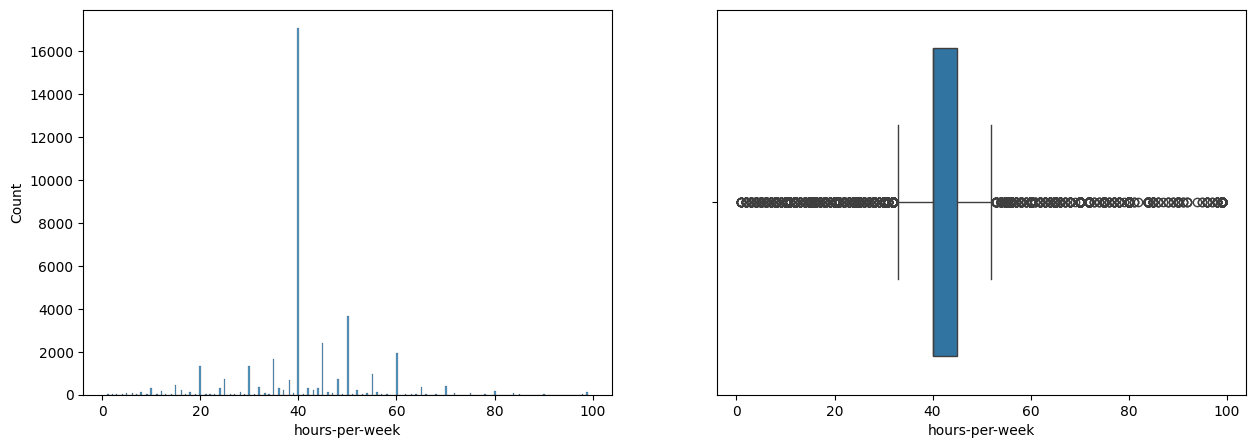

In [16]:
hist_with_box(data=numeric_data, col_name="hours-per-week")

In [17]:
for col in categorical_data.columns:
  print(categorical_data[col].value_counts())
  print("#############################")


workclass
Private             27717
Self-emp-not-inc     3669
Local-gov            2975
State-gov            1892
Self-emp-inc         1595
Federal-gov          1371
Without-pay            21
Never-worked            0
Name: count, dtype: int64
#############################
marital-status
Married-civ-spouse       17947
Never-married            12169
Divorced                  5885
Separated                 1394
Widowed                   1261
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64
#############################
occupation
Prof-specialty       5516
Exec-managerial      5311
Adm-clerical         4742
Sales                4671
Craft-repair         4634
Other-service        4252
Machine-op-inspct    2440
Transport-moving     2032
Handlers-cleaners    1712
Farming-fishing      1424
Tech-support         1325
Protective-serv       937
Priv-house-serv       230
Armed-Forces           14
Name: count, dtype: int64
#############################
relatio

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39240 non-null  int64   
 1   workclass       39240 non-null  category
 2   education-num   39240 non-null  int64   
 3   marital-status  39240 non-null  category
 4   occupation      39240 non-null  category
 5   relationship    39240 non-null  category
 6   race            39240 non-null  category
 7   sex             39240 non-null  category
 8   capital-gain    39240 non-null  int64   
 9   capital-loss    39240 non-null  int64   
 10  hours-per-week  39240 non-null  int64   
 11  native-country  39240 non-null  category
 12  class           39240 non-null  category
dtypes: category(8), int64(5)
memory usage: 2.1 MB


In [19]:
df["class"].value_counts()

,count
class,
<=50K,29265
>50K,9975


In [20]:
X = df.drop("class", axis=1)
y = df["class"]

## ML

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

**split the data into 70% Training, 15% Testing, 15% Validation**

In [96]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 27468
Validation size: 5886
Test size: 5886


In [99]:
print(y_test[110])

1


**Encode target**

In [97]:
# Ecode the target
target_encoder = LabelEncoder()

y_train = target_encoder.fit_transform(y_train)
y_val = target_encoder.transform(y_val)
y_test = target_encoder.transform(y_test)

**preprare the data to can train it inside the ANN that i will build**

In [24]:
numerical_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_features = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

preprocessor = ColumnTransformer(
    transformers=
     [
        ("num_scaling", StandardScaler(), numerical_features),
        ("cat_encoding_ohe", OneHotEncoder(handle_unknown='ignore'), categorical_features)
     ]
)


models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "SVC": SVC(C=10, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=50)
}

for name, model in models.items():
  pipeline = Pipeline(
      steps=[
          ("preprocessing", preprocessor),
          ("model", model)
      ]
  )

  pipeline.fit(X_train, y_train)
  y_pred_val =pipeline.predict(X_val)

  print(name)
  print(classification_report(y_val, y_pred_val))
  print(confusion_matrix(y_val, y_pred_val))
  print("#######################################################")


Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4390
           1       0.59      0.84      0.69      1496

    accuracy                           0.81      5886
   macro avg       0.76      0.82      0.78      5886
weighted avg       0.85      0.81      0.82      5886

[[3506  884]
 [ 240 1256]]
#######################################################
SVC
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4390
           1       0.58      0.85      0.69      1496

    accuracy                           0.80      5886
   macro avg       0.76      0.82      0.77      5886
weighted avg       0.85      0.80      0.81      5886

[[3451  939]
 [ 222 1274]]
#######################################################
KNN
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4390
           1       0.72      0.60      0.65

* Depend on this Comparison the KNN is best model here then LogisticRegression Then SVC

In [25]:
X_test.reset_index(drop=True,inplace=True)

In [26]:
print(X_test.iloc[110])
print("#################################")
print(y_test[110])


age                               54
workclass                  Local-gov
education-num                     11
marital-status    Married-civ-spouse
occupation           Protective-serv
relationship                 Husband
race                           White
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    38
native-country         United-States
Name: 110, dtype: object
#################################
1


* The Current Model in Pipeline is KNN

In [27]:
new_sample = X_test.iloc[[110]]

prediction = pipeline.predict(new_sample)
print("Prediction (encoded):", prediction)
predicted_class = target_encoder.inverse_transform(prediction)
print("Predicted class:", predicted_class)

Prediction (encoded): [1]
Predicted class: ['>50K']


## DL

**we need to preprare data to can use in ANN**

In [42]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [29]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()
X_test = preprocessor.transform(X_test).toarray()

In [32]:
model_DL = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X_train.shape[1], )),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)

model_DL.compile(optimizer=Adam(learning_rate=0.05), loss="binary_crossentropy", metrics=["accuracy"])

history = model_DL.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=100
)

# Set verbose to 0 to avoid printing progress bar for each epoch

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8335 - loss: 0.3576 - val_accuracy: 0.8495 - val_loss: 0.3323
Epoch 2/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3346 - val_accuracy: 0.8437 - val_loss: 0.3309
Epoch 3/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8391 - loss: 0.3361 - val_accuracy: 0.8410 - val_loss: 0.3376
Epoch 4/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8485 - loss: 0.3278 - val_accuracy: 0.8440 - val_loss: 0.3278
Epoch 5/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3153 - val_accuracy: 0.8476 - val_loss: 0.3283
Epoch 6/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8485 - loss: 0.3210 - val_accuracy: 0.8503 - val_loss: 0.3534
Epoch 7/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8473 - loss: 0.3173 - val_accuracy: 0.8469 - val_loss: 0.3308
Epoch 8/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8490 - loss: 0.3170 - val_accuracy: 0.8474 - val_

In [33]:
#Evaluate the model on the training set
loss, accuracy = model_DL.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {accuracy:.4f}")

# Evaluate the model on the validation set
loss, accuracy = model_DL.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")

# Evaluate the model on the test set
loss, accuracy = model_DL.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Training Accuracy: 0.8623
Validation Accuracy: 0.8459
Test Accuracy: 0.8413


In [34]:
model_DL.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,237 (90.77 KB)

 Trainable params: 7,745 (30.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,492 (60.52 KB)

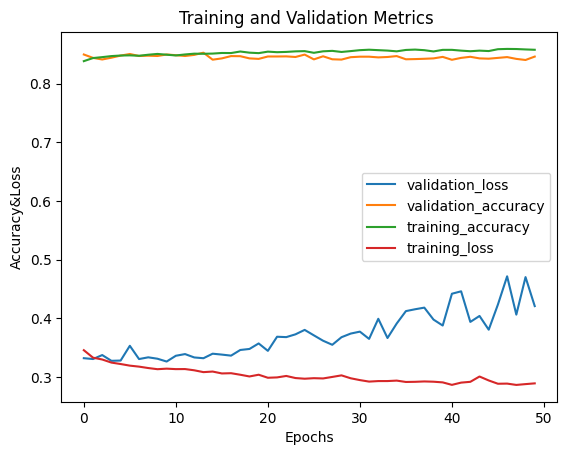

In [35]:
sns.lineplot(data=history.history["val_loss"], label="validation_loss")
sns.lineplot(data=history.history["val_accuracy"], label="validation_accuracy")
sns.lineplot(data=history.history["accuracy"], label="training_accuracy")
sns.lineplot(data=history.history["loss"], label="training_loss")
plt.title("Training and Validation Metrics ")
plt.xlabel("Epochs")
plt.ylabel("Accuracy&Loss")
plt.show()

* Training accuracy  keeps improving slowly

* Validation accuracy  is slightly lower  and almost flat across epochs.

* Training loss  keeps decreasing nicely.

* Validation loss  goes down at first, then starts to creep upward as epochs increase.
    * So we can make Early Stopping
    * Or Add some layers to learn more

In [37]:
def build_model():
  model_DL2 = Sequential(
      [
          Dense(64, activation="relu", input_shape=(X_train.shape[1], )),
          Dense(32, activation="relu"),
          Dense(1, activation="sigmoid")
      ]
  )

  return model_DL2

In [38]:
optimizers_types={
    "SGD":SGD(learning_rate=0.01),
    "SGD_with_Momentum":SGD(learning_rate=0.01, momentum=0.7),
    "Adam":Adam(learning_rate=0.01)
}

# to save all details about model using different Optimizer
histories = {}

for name, opt in optimizers_types.items():
  model = build_model()
  model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=100, verbose=0)
  histories[name] = history


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


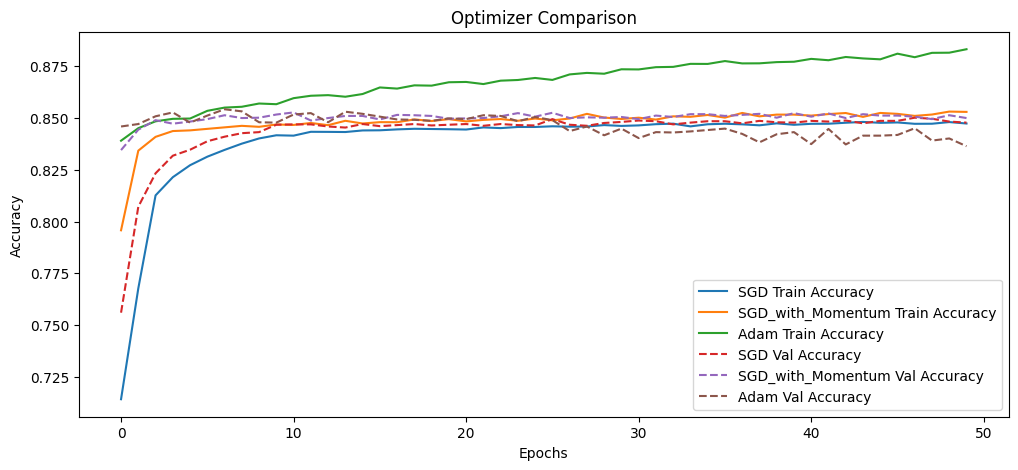

In [39]:
plt.figure(figsize=(12,5))

# Training Accuracy
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')

# Validation Accuracy
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{name} Val Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Optimizer Comparison")
plt.show()

* Adam is the fastest convergence
* For which give the best generalization can be SGD or SGD_with_Momentum
* Why Adam performs better than SGD?
  * Adam adapts the learning rate
  * Combines Momentum & RMSprop
  * Takes big steps in flat regions and small stesp in steep regions, giving faster convergence
* Adam here show higher train accuracy, but validation didn't increase and this make overfitting problem

In [41]:
batch_sizes = [30, 60, 128, 500,1024]
results = {}
for size in batch_sizes:
  model = build_model()
  model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
  # to can measure the time we will use the time module
  t0 = time.time()
  history = model.fit(
      X_train,
      y_train,
      validation_data=(X_val, y_val),
      epochs=50,
      batch_size=size,
      verbose = 0
  )
  t1 = time.time()

  train_time = t1 - t0
  # for each size make evalution for training and validation and testing
  train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
  test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

  results[size] = {
      "history": history,
      "train_time": train_time,
      "train_acc": round(train_accuracy, 5),
      "val_acc": round(val_accuracy, 5),
      "test_acc": round(test_accuracy, 5),
      "train_loss": round(train_loss, 5),
      "val_loss": round(val_loss, 5),
      "test_loss":round(test_loss, 5)

  }
  print(f"For Batch_Size = {size}, The Training Time = {results[size]['train_time']:.4f}")
  print(f"Train_accuracy = {train_accuracy:.4f} & Validation_accuracy = {val_accuracy:.4f} & Testing_accuracy = {test_accuracy:.4f}")
  print(f"Train_Loss = {train_loss:.4f} & Validation_Loss = {val_loss:.4f} & Testing_Loss = {test_loss:.4f}")
  print("######################################################################################################")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


For Batch_Size = 30, The Training Time = 115.3343
Train_accuracy = 0.8838 & Validation_accuracy = 0.8362 & Testing_accuracy = 0.8361
Train_Loss = 0.2390 & Validation_Loss = 0.3976 & Testing_Loss = 0.3936
######################################################################################################
For Batch_Size = 60, The Training Time = 69.3263
Train_accuracy = 0.8795 & Validation_accuracy = 0.8417 & Testing_accuracy = 0.8308
Train_Loss = 0.2524 & Validation_Loss = 0.3552 & Testing_Loss = 0.3749
######################################################################################################
For Batch_Size = 128, The Training Time = 42.5145
Train_accuracy = 0.8764 & Validation_accuracy = 0.8451 & Testing_accuracy = 0.8355
Train_Loss = 0.2610 & Validation_Loss = 0.3531 & Testing_Loss = 0.3622
######################################################################################################
For Batch_Size = 500, The Training Time = 19.7845
Train_accuracy = 0.8667 & Vali

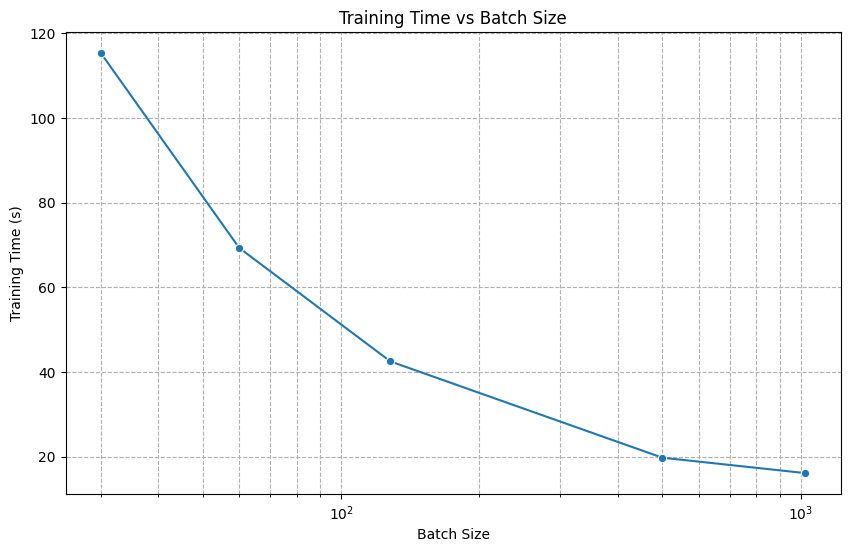

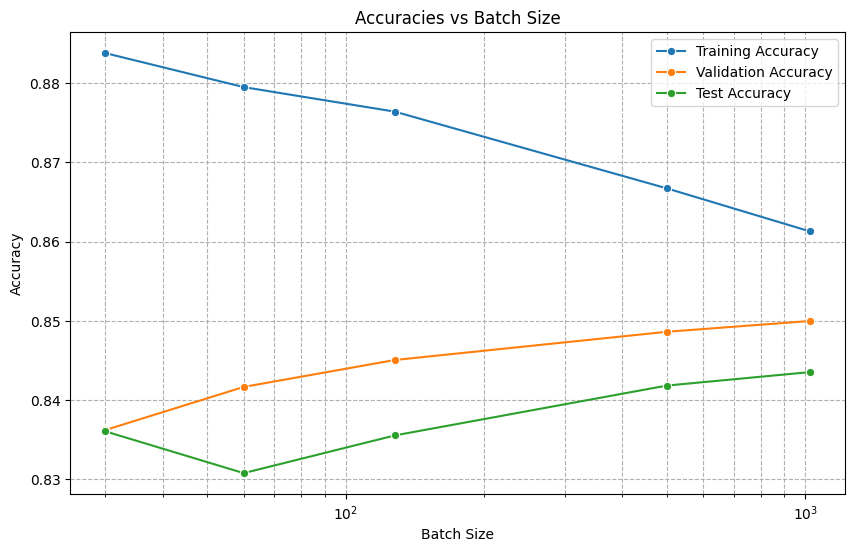

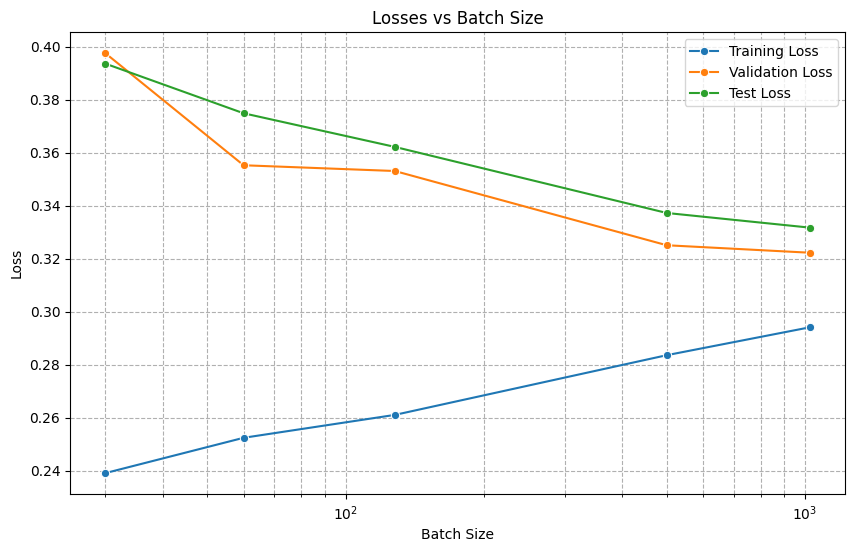

In [43]:
# Extract data from the results dictionary
batch_sizes = list(results.keys())
train_times = [results[size]['train_time'] for size in batch_sizes]
train_accs = [results[size]['train_acc'] for size in batch_sizes]
val_accs = [results[size]['val_acc'] for size in batch_sizes]
test_accs = [results[size]['test_acc'] for size in batch_sizes]
train_losses = [results[size]['train_loss'] for size in batch_sizes]
val_losses = [results[size]['val_loss'] for size in batch_sizes]
test_losses = [results[size]['test_loss'] for size in batch_sizes]

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Training Time (s)': train_times,
    'Training Accuracy': train_accs,
    'Validation Accuracy': val_accs,
    'Test Accuracy': test_accs,
    'Training Loss': train_losses,
    'Validation Loss': val_losses,
    'Test Loss': test_losses
})

# Sort by batch size for a clear plot
plot_data = plot_data.sort_values('Batch Size')

# Plotting Training Time vs Batch Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Batch Size', y='Training Time (s)', marker='o')
plt.title('Training Time vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (s)')
plt.xscale('log') # Use a log scale for batch size if the range is large
plt.grid(True, which="both", linestyle='--')
plt.show()

# Plotting Accuracies vs Batch Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Batch Size', y='Training Accuracy', marker='o', label='Training Accuracy')
sns.lineplot(data=plot_data, x='Batch Size', y='Validation Accuracy', marker='o', label='Validation Accuracy')
sns.lineplot(data=plot_data, x='Batch Size', y='Test Accuracy', marker='o', label='Test Accuracy')
plt.title('Accuracies vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.xscale('log') # Use a log scale for batch size
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.show()

# Plotting Losses vs Batch Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Batch Size', y='Training Loss', marker='o', label='Training Loss')
sns.lineplot(data=plot_data, x='Batch Size', y='Validation Loss', marker='o', label='Validation Loss')
sns.lineplot(data=plot_data, x='Batch Size', y='Test Loss', marker='o', label='Test Loss')
plt.title('Losses vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.xscale('log') # Use a log scale for batch size
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.show()

* Which batch size leads to the noisiest gradient updates?
  * Smaller batch sizes (like 30) lead to the noisiest gradient updates. This is because the gradient is calculated based on a smaller subset of the data in each step, causing more fluctuation in the direction of optimization.
* Which batch size generalizes better and why?
  * Larger batch sizes (like 500 and 1024) appear to generalize better in this case, as indicated by their higher validation and test accuracies and smaller gap between training and validation/test accuracies.
  * While smaller batch sizes introduce more noise which can help escape local minima, very small batch sizes can lead to unstable training and overfitting. Larger batch sizes provide a more accurate estimate of the true gradient of the loss function over the entire dataset, leading to a smoother and more stable convergence. This can sometimes lead to finding flatter minima in the loss landscape, which are associated with better generalization.

In [45]:
model_DL = Sequential(
    [
        Dense(256, activation="relu", kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], )),
        Dropout(rate=0.5),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dense(1, activation="sigmoid")
    ]
)

model_DL.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model_DL.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=100
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8023 - loss: 1.6396 - val_accuracy: 0.8406 - val_loss: 0.4001
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8336 - loss: 0.3968 - val_accuracy: 0.8474 - val_loss: 0.3700
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8387 - loss: 0.3728 - val_accuracy: 0.8483 - val_loss: 0.3634
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8343 - loss: 0.3775 - val_accuracy: 0.8432 - val_loss: 0.3609
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8385 - loss: 0.3686 - val_accuracy: 0.8474 - val_loss: 0.3569
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8387 - loss: 0.3693 - val_accuracy: 0.8452 - val_loss: 0.3593
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8372 - loss: 0.3680 - val_accuracy: 0.8457 - val_loss: 0.3637
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8398 - loss: 0.3688 - val_accuracy: 0.8445

In [46]:
#Evaluate the model on the training set
loss, accuracy = model_DL.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {accuracy:.4f}")

# Evaluate the model on the validation set
loss, accuracy = model_DL.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")

# Evaluate the model on the test set
loss, accuracy = model_DL.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")



Training Accuracy: 0.8456
Validation Accuracy: 0.8451
Test Accuracy: 0.8406


In [47]:
model_DL.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,661 (651.02 KB)

 Trainable params: 55,553 (217.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 111,108 (434.02 KB)

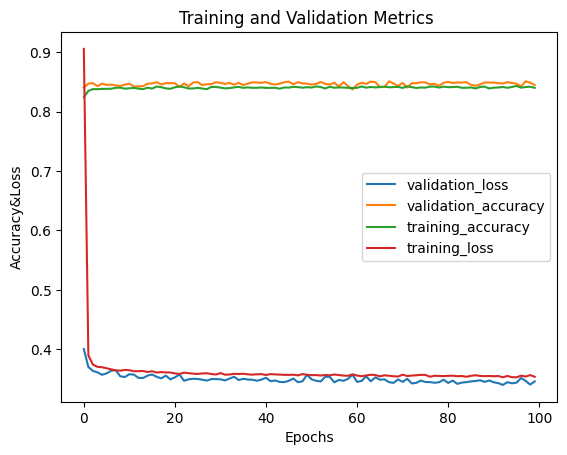

In [48]:
sns.lineplot(data=history.history["val_loss"], label="validation_loss")
sns.lineplot(data=history.history["val_accuracy"], label="validation_accuracy")
sns.lineplot(data=history.history["accuracy"], label="training_accuracy")
sns.lineplot(data=history.history["loss"], label="training_loss")
plt.title("Training and Validation Metrics ")
plt.xlabel("Epochs")
plt.ylabel("Accuracy&Loss")
plt.show()

**Before Add Dropout layer & l2_regulizer**
* Training Accuracy: 0.9301
* Validation Accuracy: 0.8167
* Test Accuracy: 0.8163
  * Actually this overfiting due to:
      * add more neurons in each layer
      * increase number of epochs from 50 to 100
  
**After Add Dropout layer & l2_regulizer**
* Training Accuracy: 0.8446
* Validation Accuracy: 0.8462
* Test Accuracy: 0.8435

In [50]:
# We can train the  same model with Early Stopping
# model_DL = Sequential(
#     [
#         Dense(256, activation="relu", kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], )),
#         Dropout(rate=0.5),
#         Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
#         Dense(1, activation="sigmoid")
#     ]
# )

# model_DL.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


early_stopping = EarlyStopping(
    monitor ="val_loss",
    min_delta = 0.001, # minimum change required to count as na improvment
    patience = 5, # stop after 5 epochs with no improvement
    restore_best_weights=True
)

history = model_DL.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=100,
    callbacks=[early_stopping]
)



Epoch 1/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8480 - loss: 0.3509 - val_accuracy: 0.8507 - val_loss: 0.3433
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8430 - loss: 0.3532 - val_accuracy: 0.8471 - val_loss: 0.3430
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8432 - loss: 0.3517 - val_accuracy: 0.8479 - val_loss: 0.3427
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8370 - loss: 0.3612 - val_accuracy: 0.8471 - val_loss: 0.3463
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8455 - loss: 0.3523 - val_accuracy: 0.8420 - val_loss: 0.3453
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8433 - loss: 0.3472 - val_accuracy: 0.8447 - val_loss: 0.3447


In [53]:
print(f"The Model Stops After  {len(history.history["val_loss"])}  Epochs ")

The Model Stops After  6  Epochs 


In [51]:
#Evaluate the model on the training set
loss, accuracy = model_DL.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {accuracy:.4f}")

# Evaluate the model on the validation set
loss, accuracy = model_DL.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")

# Evaluate the model on the test set
loss, accuracy = model_DL.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")




Training Accuracy: 0.8464
Validation Accuracy: 0.8507
Test Accuracy: 0.8435


In [117]:
new_sample = preprocessor.transform(X_test.iloc[[600]]).toarray()
new_sample

array([[ 1.25637603, -0.42961005, -0.15606872, -0.23289455,  0.70567355,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [119]:
y_test[600]

np.int64(0)

In [120]:
# Make a prediction on the new sample
prediction_prob = model_DL.predict(new_sample)
prediction = (prediction_prob > 0.5).astype(int)

print("Prediction probability:", prediction_prob[0][0])
print("Prediction (encoded):", prediction[0])
predicted_class = target_encoder.inverse_transform(prediction[0])
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction probability: 0.42736602
Prediction (encoded): [0]
Predicted class: ['<=50K']


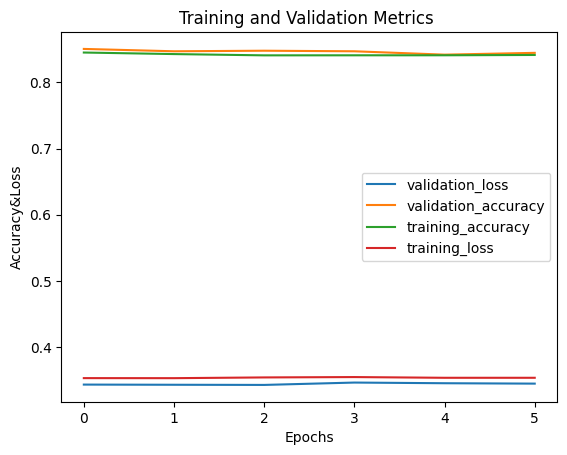

In [54]:
sns.lineplot(data=history.history["val_loss"], label="validation_loss")
sns.lineplot(data=history.history["val_accuracy"], label="validation_accuracy")
sns.lineplot(data=history.history["accuracy"], label="training_accuracy")
sns.lineplot(data=history.history["loss"], label="training_loss")
plt.title("Training and Validation Metrics ")
plt.xlabel("Epochs")
plt.ylabel("Accuracy&Loss")
plt.show()

#  Reflection
1. The Role of Optimizers

    * Optimizers control how the model updates its weights during training.

    * SGD: Simple but can be slow to converge.

    * SGD + Momentum: Speeds up convergence and avoids oscillations.

    * Adam: Often the most effective in practice, combining the benefits of Momentum and adaptive learning rates.

2. The Effect of Batch Size

    * Very small batches (e.g., 1, 32) → produce noisy gradient updates, which can help generalization but slow down training.

    * Very large batches (e.g., 1024) → training is faster on GPUs, but can lead to sharp minima and weaker generalization.

    * Moderate batch sizes (32–128) → usually strike the best balance between speed and generalization.

3. Regularization Methods

    * L2 Regularization (weight decay): Keeps weights small and reduces overfitting.

    * Dropout: Randomly disables neurons during training, forcing the network to learn more robust and diverse features.

    * In practice, combining both is often most effective.

4. Early Stopping

    * Stops training automatically when validation loss stops improving.

    * Prevents overfitting by avoiding unnecessary training epochs.

    * Saves time and ensures the model keeps the best weights.

5. Train/Validation/Test Splits

    * Proper splitting ensures fair evaluation.

    * A common strategy: 70% training, 15% validation, 15% test.

    * Training = learning weights, Validation = tuning hyperparameters, Test = final unbiased performance check.

    * For small datasets, K-Fold Cross Validation can be used.


##  If I Train a New Deep Learning Model on Tabular Data:

  * Optimizer → Start with Adam, since it converges quickly and generally gives strong results without extensive tuning.

  * Batch Size → Use 32 or 64, as these values balance speed and generalization.

  * Regularization → Add L2 weight decay and Dropout in deeper layers to reduce overfitting.

  * Early Stopping → Monitor validation loss and stop when it plateaus, keeping the best weights.

  * Data Splitting Strategy → Use 70/15/15 split for training, validation, and test sets. For small datasets, prefer K-Fold Cross Validation.

## Summary:

  * My choices would be Adam + batch size of 32–64, with L2 + Dropout regularization, EarlyStopping enabled, and a 70/15/15 split. This combination provides fast convergence, avoids overfitting, and maximizes generalization on unseen data.